# mam's code

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import confusion_matrix, classification_report

Epoch 1/20 | Train Acc: 0.9180 | Val Acc: 0.9167 | Train Loss: 1.9422 | Val Loss: 1.9587
Epoch 2/20 | Train Acc: 0.9273 | Val Acc: 0.9236 | Train Loss: 1.4653 | Val Loss: 1.2984
Epoch 3/20 | Train Acc: 0.9536 | Val Acc: 0.9375 | Train Loss: 0.7365 | Val Loss: 0.7925
Epoch 4/20 | Train Acc: 0.9265 | Val Acc: 0.8958 | Train Loss: 1.0019 | Val Loss: 1.1012
Epoch 5/20 | Train Acc: 0.9451 | Val Acc: 0.9236 | Train Loss: 0.5291 | Val Loss: 0.6099
Epoch 6/20 | Train Acc: 0.9559 | Val Acc: 0.9236 | Train Loss: 0.3631 | Val Loss: 0.3543
Epoch 7/20 | Train Acc: 0.9474 | Val Acc: 0.9444 | Train Loss: 0.3770 | Val Loss: 0.3086
Epoch 8/20 | Train Acc: 0.9397 | Val Acc: 0.9306 | Train Loss: 0.4812 | Val Loss: 0.8049
Epoch 9/20 | Train Acc: 0.9722 | Val Acc: 0.9583 | Train Loss: 0.2107 | Val Loss: 0.2388
Epoch 10/20 | Train Acc: 0.9667 | Val Acc: 0.9583 | Train Loss: 0.1827 | Val Loss: 0.2792
Epoch 11/20 | Train Acc: 0.9706 | Val Acc: 0.9514 | Train Loss: 0.1902 | Val Loss: 0.2261
Epoch 12/20 | Train

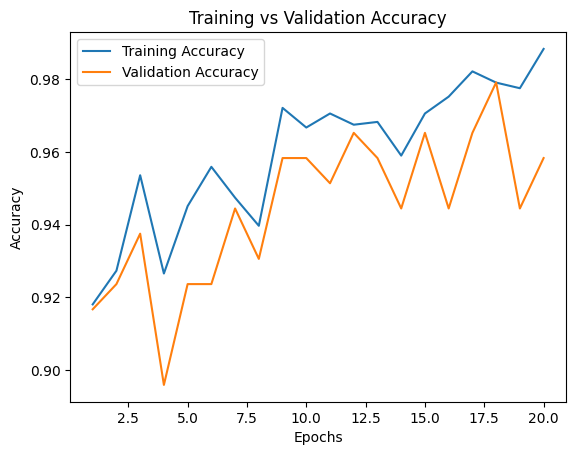

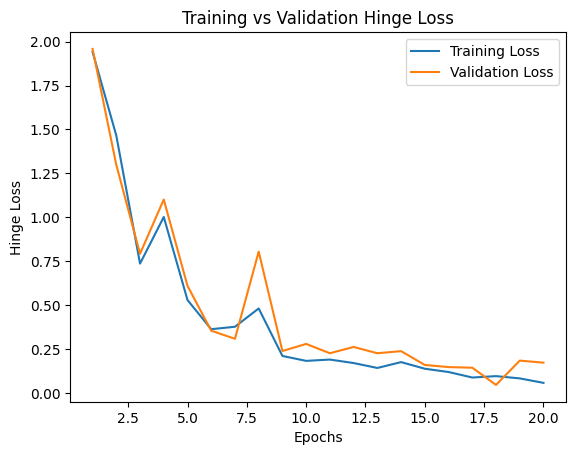

In [4]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, hinge_loss, confusion_matrix, classification_report
from sklearn.utils import shuffle

# --------------------------------------------------
# 1. Load Dataset (Offline Safe)
# --------------------------------------------------
digits = load_digits()
X = digits.data
y = digits.target

# Normalize pixel values (0–16 → 0–1)
X = X / 16.0

# --------------------------------------------------
# 2. Train-Test Split
# --------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# --------------------------------------------------
# 3. Train-Validation Split
# --------------------------------------------------
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42, stratify=y_train
)

# --------------------------------------------------
# 4. Initialize Linear SVM (SGD-based)
# --------------------------------------------------
svm = SGDClassifier(
    loss="hinge",
    learning_rate="optimal",
    eta0=0.01,
    max_iter=1,
    warm_start=True,
    random_state=42
)

epochs = 20
train_acc = []
val_acc = []
train_loss = []
val_loss = []

classes = np.unique(y_train)

# --------------------------------------------------
# 5. Training Loop
# --------------------------------------------------
for epoch in range(epochs):

    # Shuffle each epoch (important for SGD)
    X_train, y_train = shuffle(X_train, y_train, random_state=epoch)

    # Train one epoch
    svm.partial_fit(X_train, y_train, classes=classes)

    # Predictions
    y_train_pred = svm.predict(X_train)
    y_val_pred = svm.predict(X_val)

    # Accuracy
    train_acc.append(accuracy_score(y_train, y_train_pred))
    val_acc.append(accuracy_score(y_val, y_val_pred))

    # Decision scores (for hinge loss)
    train_scores = svm.decision_function(X_train)
    val_scores = svm.decision_function(X_val)

    # True hinge loss
    train_loss.append(hinge_loss(y_train, train_scores))
    val_loss.append(hinge_loss(y_val, val_scores))

    print(f"Epoch {epoch+1}/{epochs} | "
          f"Train Acc: {train_acc[-1]:.4f} | "
          f"Val Acc: {val_acc[-1]:.4f} | "
          f"Train Loss: {train_loss[-1]:.4f} | "
          f"Val Loss: {val_loss[-1]:.4f}")

# --------------------------------------------------
# 6. Final Test Evaluation
# --------------------------------------------------
y_test_pred = svm.predict(X_test)

print("\nFinal Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

# --------------------------------------------------
# 7. Plot Accuracy
# --------------------------------------------------
plt.figure()
plt.plot(range(1, epochs+1), train_acc)
plt.plot(range(1, epochs+1), val_acc)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])
plt.show()

# --------------------------------------------------
# 8. Plot Hinge Loss
# --------------------------------------------------
plt.figure()
plt.plot(range(1, epochs+1), train_loss)
plt.plot(range(1, epochs+1), val_loss)
plt.xlabel("Epochs")
plt.ylabel("Hinge Loss")
plt.title("Training vs Validation Hinge Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

# ASSIGNMENT

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()

X = digits.data / 16.0
y = digits.target

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Dataset loaded successfully.")
print("Shape:", X.shape)

Dataset loaded successfully.
Shape: (1797, 64)


In [2]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape
X_train = X_train.reshape(-1, 28*28) / 255.0
X_test = X_test.reshape(-1, 28*28) / 255.0

ModuleNotFoundError: No module named 'tensorflow'